In [590]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
import pandas as pd

# Данные по кредитам клиентов одного из банков Германии

In [673]:
data = pd.read_csv('./german_credit_data.csv')

# EDA

In [674]:
data.head(20)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
5,5,35,male,1,free,NaN,NaN,9055,36,education
6,6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment
7,7,35,male,3,rent,little,moderate,6948,36,car
8,8,61,male,1,own,rich,NaN,3059,12,radio/TV
9,9,28,male,3,own,little,moderate,5234,30,car


In [675]:
data.drop('Unnamed: 0', axis = 1, inplace = True )

In [676]:
data['Saving accounts'].value_counts()

Saving accounts
little        603
moderate      103
quite rich     63
rich           48
Name: count, dtype: int64

In [677]:
data['Checking account'].value_counts()

Checking account
little      274
moderate    269
rich         63
Name: count, dtype: int64

In [678]:
data['Saving accounts'] = data['Saving accounts'].apply(lambda x: 1 if x=='little' else 2 if x=='moderate' else 3 if x=='quite rich' else 4 if x=='rich' else 0) 

In [679]:
data['Checking account'] = data['Checking account'].apply(lambda x: 1 if x=='little' else 2 if x=='moderate' else 3 if x=='rich' else 0) 

Интересна длительность кредитного периода

In [681]:
data['Duration'].max()

72

In [682]:
data['Purpose'].unique()

array(['radio/TV', 'education', 'furniture/equipment', 'car', 'business',
       'domestic appliances', 'repairs', 'vacation/others'], dtype=object)

Учитывая, что недвижимости в "Purpose" нет, все-таки 72 месяца, а не 72 года.

In [683]:
data['Sex'].value_counts()

Sex
male      690
female    310
Name: count, dtype: int64

Мужчины чаще берут кредит. Возможно женщины меньше вовлечены в экономику, чем мужчины. Kinder, Küche, Kirche.

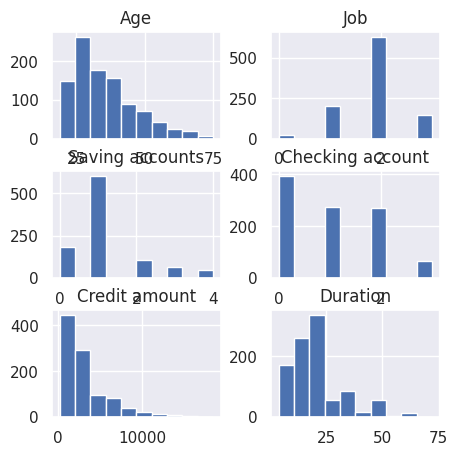

In [684]:
data.hist(figsize=(5,5));

Нормального распределения среди признаков нет.

Кредитные клиенты (мужчин среди них больше) вынуждены по большей части работать нв 2-х работах. А многие и на 3-х. Arbeit macht frei.

In [664]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [685]:
le = LabelEncoder()
cols_2_tm = ['Sex', 'Housing', 'Purpose']
data[cols_2_tm] = data[cols_2_tm].apply(le.fit_transform)
data.head(20)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,1,2,1,0,1,1169,6,5
1,22,0,2,1,1,2,5951,48,5
2,49,1,1,1,1,0,2096,12,3
3,45,1,2,0,1,1,7882,42,4
4,53,1,2,0,1,1,4870,24,1
5,35,1,1,0,0,0,9055,36,3
6,53,1,2,1,3,0,2835,24,4
7,35,1,3,2,1,2,6948,36,1
8,61,1,1,1,4,0,3059,12,5
9,28,1,3,1,1,2,5234,30,1


<Axes: >

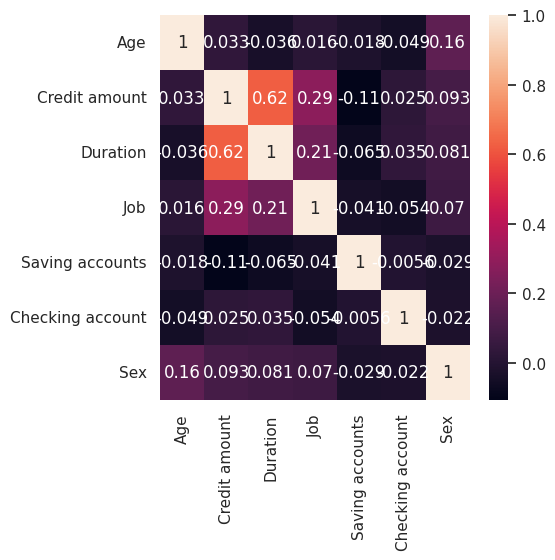

In [686]:
corr = data[['Age', 'Credit amount', 'Duration', 'Job', 'Saving accounts', 'Checking account', 'Sex']].corr()
plt.figure(figsize=(5,5))
sns.heatmap(corr, annot=True)

Длительность кредитного периода положительно коррелирует с суммой.

# Нормализация

<Axes: >

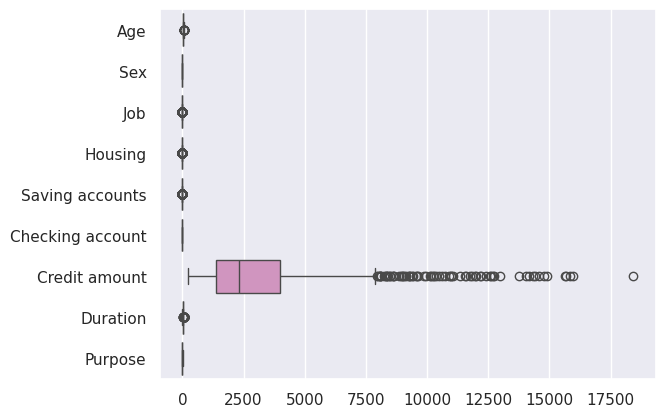

In [687]:
sns.boxplot(data=data, orient = 'h')

Для к-means нужно привести признаки к одному масштабу

In [668]:
from sklearn.preprocessing import MinMaxScaler

In [688]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(X_scaled, columns=data.columns)
data_scaled.shape

(1000, 9)

In [689]:
data_scaled.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0.857143,1.0,0.666667,0.5,0.00,0.333333,0.050567,0.029412,0.714286
1,0.053571,0.0,0.666667,0.5,0.25,0.666667,0.313690,0.647059,0.714286
2,0.535714,1.0,0.333333,0.5,0.25,0.000000,0.101574,0.117647,0.428571
3,0.464286,1.0,0.666667,0.0,0.25,0.333333,0.419941,0.558824,0.571429
4,0.607143,1.0,0.666667,0.0,0.25,0.333333,0.254209,0.294118,0.142857


<Axes: >

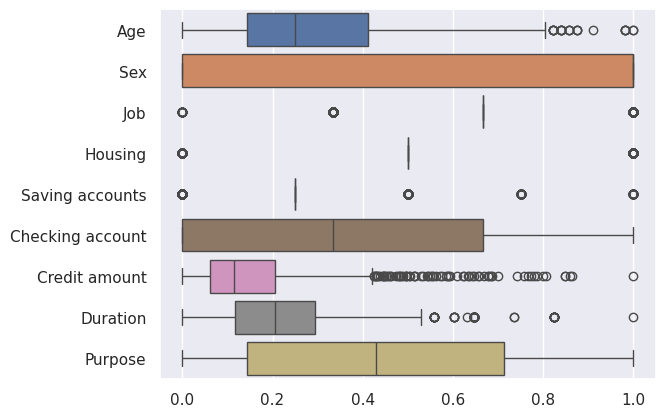

In [690]:
sns.boxplot(data=data_scaled, orient = 'h')

# Снижение размерности для визуализации

In [611]:
from sklearn.manifold import TSNE

In [691]:
tsne = TSNE(n_components=2, random_state=1)
X_tsne = tsne.fit_transform(X_scaled)
X_tsne.shape

(1000, 2)

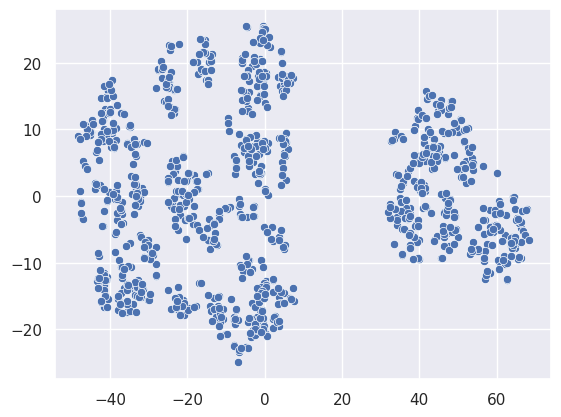

In [692]:
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1]);

# Кластеризация с помощью k-means

In [614]:
from sklearn.cluster import KMeans

Перебираем разные варианты количества кластеров с помощтю метода локтя.

In [693]:
inertia = []
for i in range(1,16):
    kmeans = KMeans(n_clusters=i, random_state=1, n_init=10).fit(X_scaled)
    labels = kmeans.labels_
    inertia_i = kmeans.inertia_
    inertia.append(inertia_i)

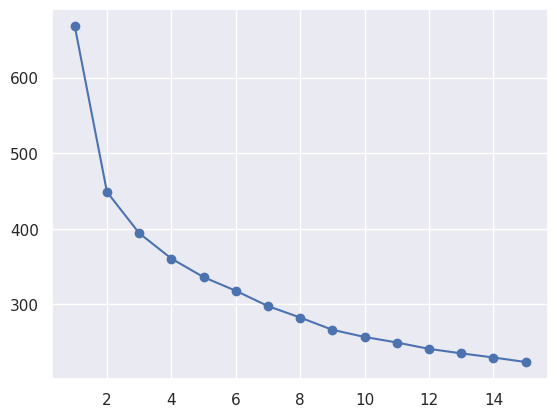

In [694]:
plt.plot(range(1,16), inertia, marker='o');

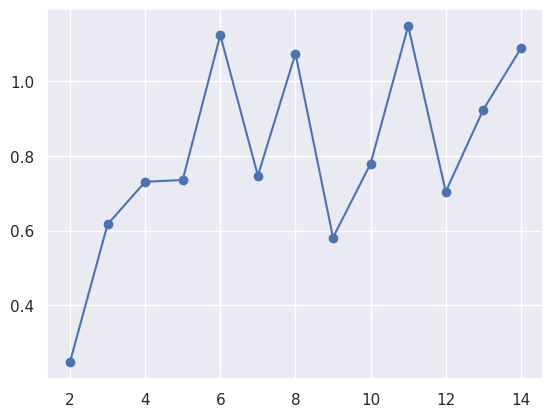

In [695]:
D = []
for i in range(1,14):
    Di = (inertia[i] - inertia[i+1])/(inertia[i-1] - inertia[i])
    D.append(Di)
plt.plot(range(2,15), D, marker='o');

# 9 кластеров

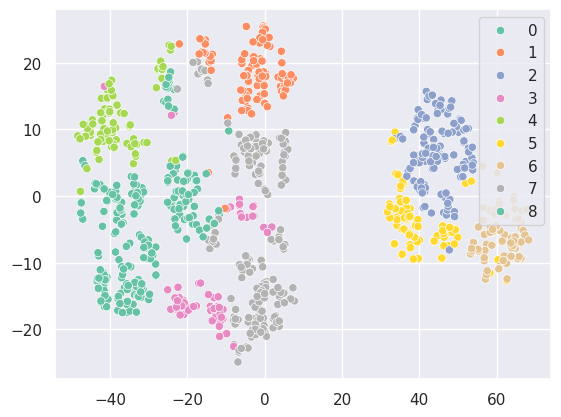

In [698]:
kmeans = KMeans(n_clusters=9, random_state=1, n_init=10).fit(X_scaled)
labels_9 = kmeans.labels_
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=labels_9, palette='Set2');

Размеры кластеров по количеству точек:

In [699]:
data['labels_9'] = labels_9
data['labels_9'].value_counts(normalize=True).sort_index()

labels_9
0    0.071
1    0.105
2    0.136
3    0.062
4    0.094
5    0.082
6    0.092
7    0.197
8    0.161
Name: proportion, dtype: float64

Точки достаточно равномерно распределены по кластерам.

# Результаты k-means (9 кластеров)

In [700]:
data.groupby('labels_9').median().T.round(2)

labels_9,0,1,2,3,4,5,6,7,8
Age,42.0,31.0,31.0,37.5,33.5,31.0,24.0,34.0,36.0
Sex,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
Job,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
Housing,0.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0
Saving accounts,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0
Checking account,1.0,2.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0
Credit amount,6224.0,2273.0,1781.5,2386.0,2363.0,2125.5,2139.0,2108.0,2775.0
Duration,36.0,18.0,16.5,18.0,18.0,18.0,18.0,18.0,18.0
Purpose,1.0,5.0,4.0,4.0,1.0,4.0,4.0,5.0,1.0


В первую очередь интересен кластер 0. Эти люди в целом старше людей из других кластеров, при этом они живут в социальном жилье, у них есть небольшие сбережения, а размер кредита и длительность самые большие. И берут в основном на машину. Риск невозврата в этом случе вероятно выше других. 
Кластер 3 - похож на средний класс, он один из "взрослых", у них самых больщой размер сбережений
В то время как кластер 6 - самый "молодой", они живут в съемном жилье, у них есть небольшие сбережения, а размер кредита не очень большой

Boxplot-ы для некоторых признаков, при группировке их занчений по 9-ти кластерам.

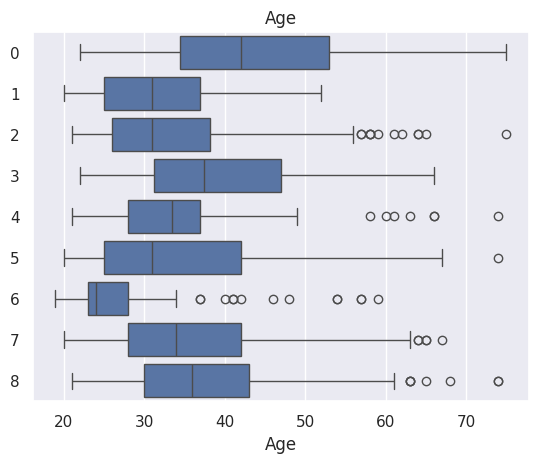

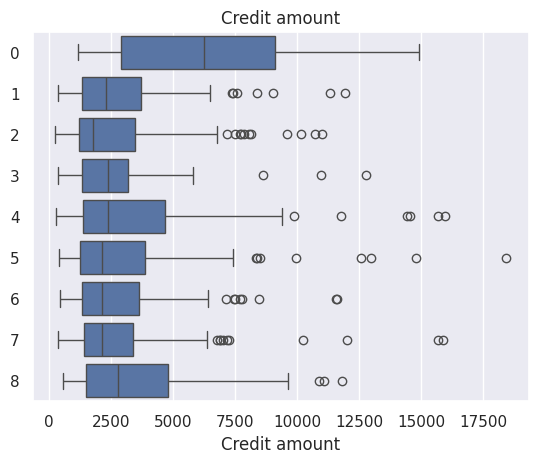

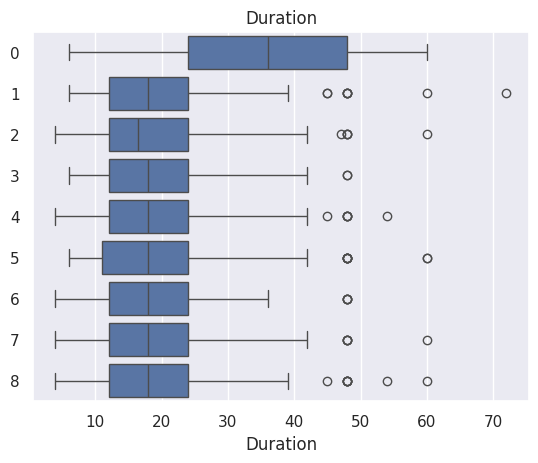

In [701]:
for col in data[['Age', 'Credit amount', 'Duration']]:
    sns.boxplot(data=cols_for_corr, x=col, y=labels_9, orient='h')
    plt.title(col)
    plt.show();

По размеру кредита, длительности кредитного периода и возрасту можно выделить кластер 9.

In [352]:
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

In [702]:
dist = 1 - cosine_similarity(X_scaled)
pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)
X_PCA.shape

(1000, 2)

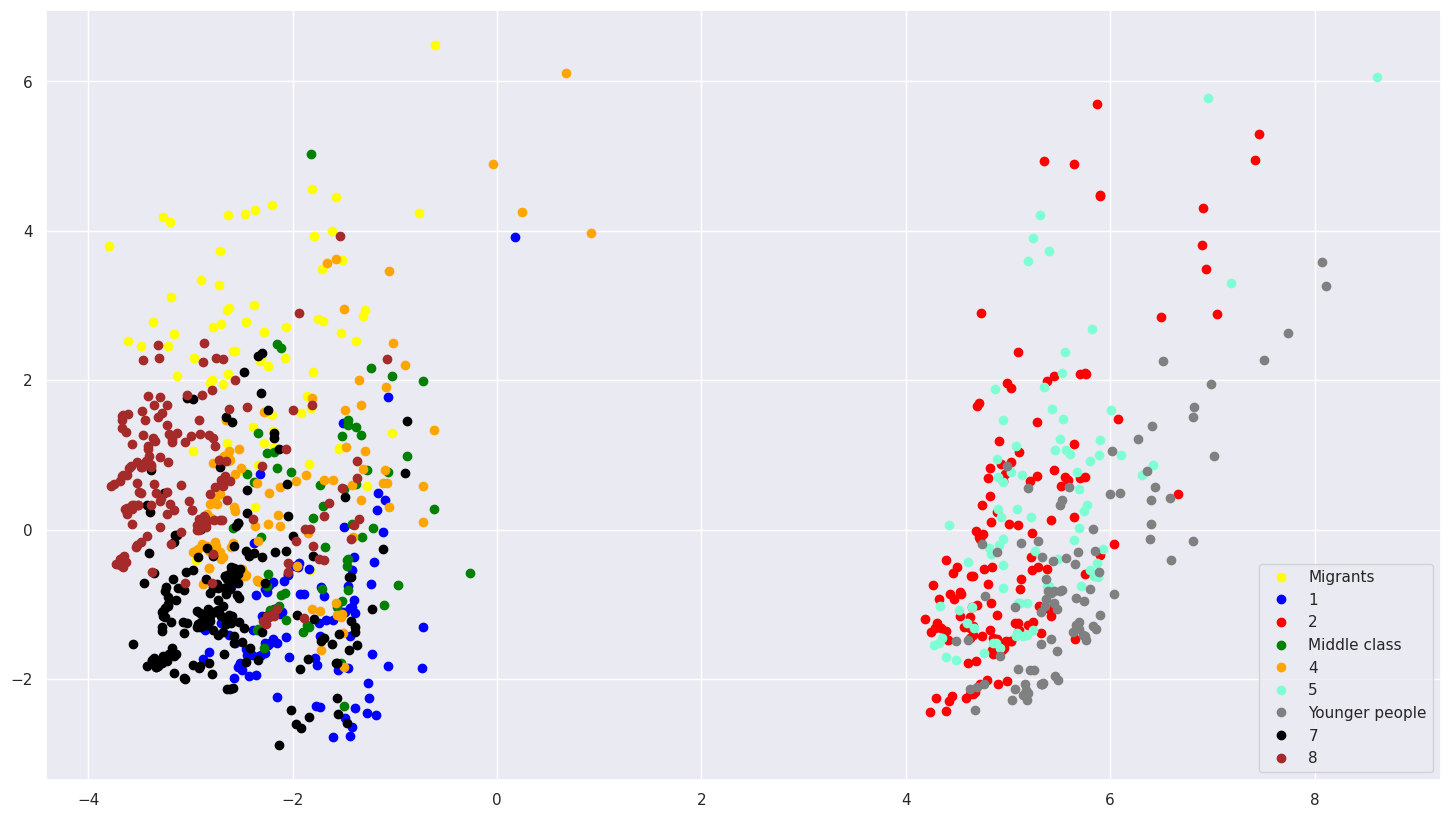

In [705]:
x, y = X_PCA[:, 0], X_PCA[:, 1]
colors = {0: 'yellow',
          1: 'blue',
          2: 'red', 
          3: 'green', 
          4: 'orange',
          5: 'aquamarine',
          6: 'gray',
          7: 'black', 
          8: 'brown'}
names = {0: 'Migrants', 
         1: '1', 
         2: '2', 
         3: 'Middle class', 
         4: '4',
         5: '5', 
         6: 'Younger people', 
         7: '7', 
         8: '8'}  
df = pd.DataFrame({'x': x, 'y':y, 'label':labels_9}) 
groups = df.groupby('label')
fig, ax = plt.subplots(figsize=(18, 10)) 
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='',
            color=colors[name],label=names[name])   
ax.legend()
plt.show()

# Agglomerative Hierarchical Clustering (AHC)

In [358]:
from scipy.cluster.hierarchy import dendrogram, linkage

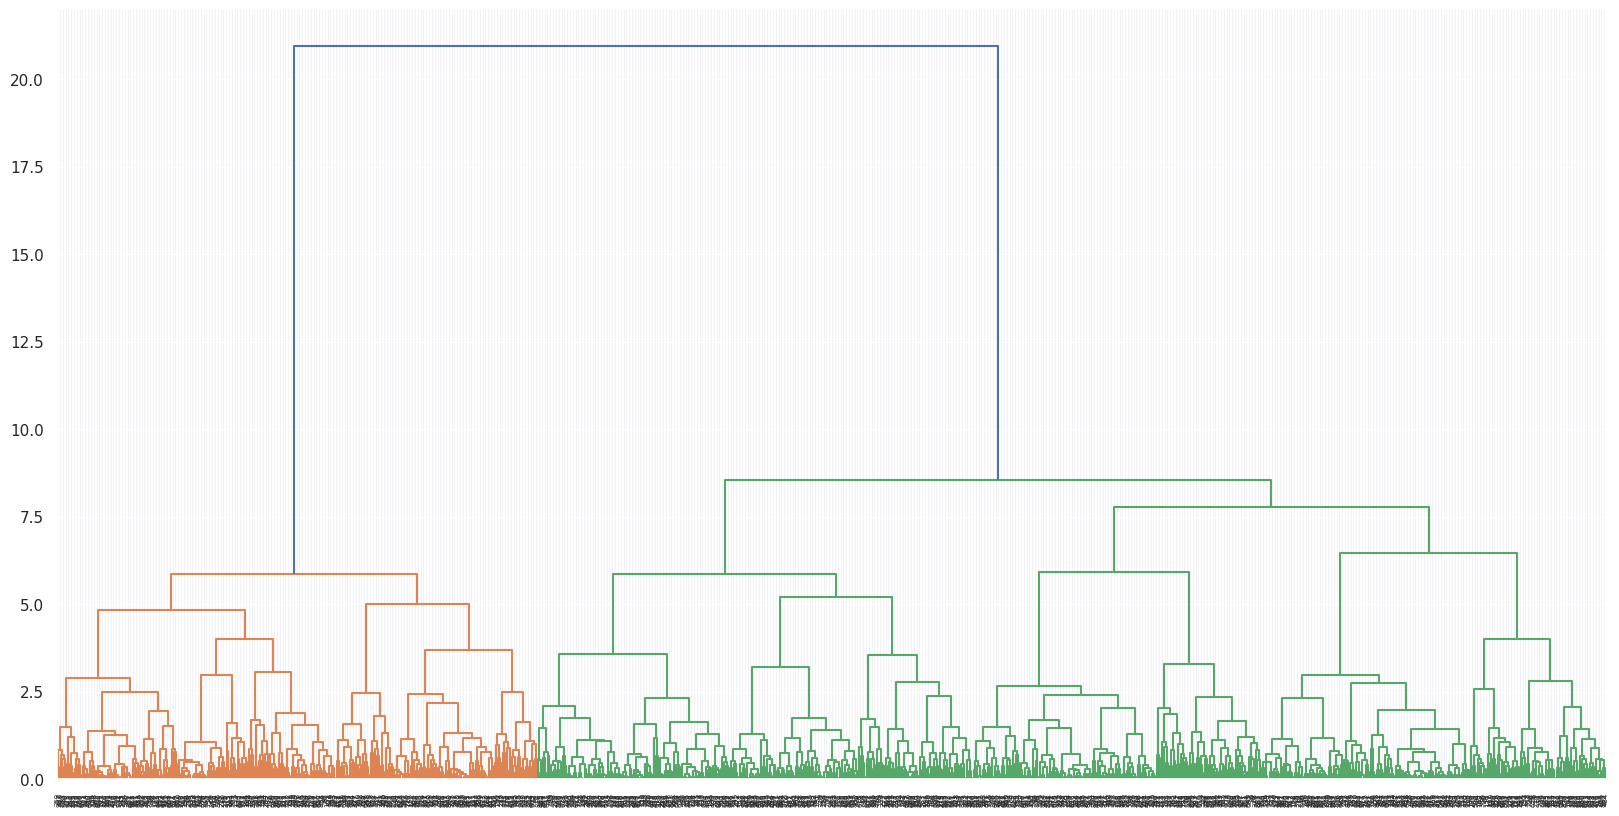

In [706]:
plt.figure(figsize=(20,10))
linkage_ = linkage(X_scaled, method='ward')
dendrogram_ = dendrogram(linkage_)

На дендрограмме визуально выделяются 6 кластеров

Силуэтный коэффициент для более точного определения максимального количества кластеров

In [360]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from tqdm import tqdm

In [647]:
silhouette = []
for i in tqdm(range(3,15)):
    agg = AgglomerativeClustering(n_clusters=i).fit(X_scaled)
    labels = agg.labels_
    score = silhouette_score(X_scaled, labels)
    silhouette.append(score)

100%|███████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 18.24it/s]


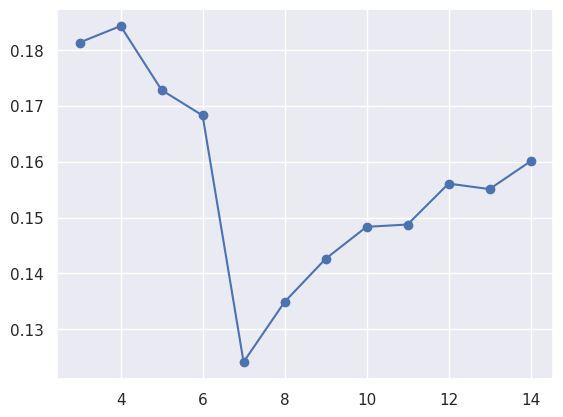

In [648]:
plt.plot(range(3,15), silhouette, marker='o');

Согласно этому графику, оптимальное число кластеров - 4

In [707]:
agg = AgglomerativeClustering(n_clusters=4).fit(X_scaled)
labels_AC = agg.labels_
plot_data = pd.DataFrame(zip(X_tsne[:,0], X_tsne[:,1], labels_AC), columns=['x', 'y', 'hue'])

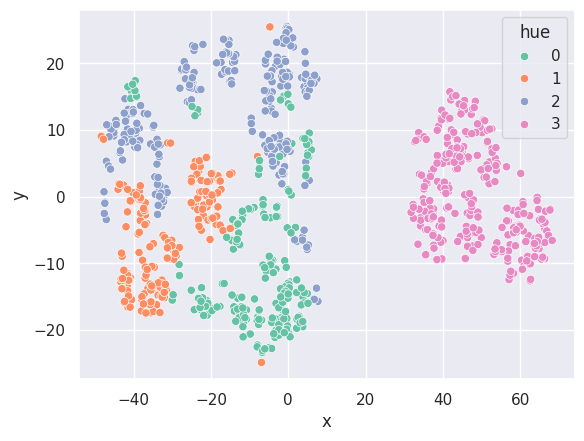

In [708]:
sns.scatterplot(plot_data, x='x', y='y', hue='hue', palette='Set2');

In [709]:
data['labels_AC'] = labels_AC
data['labels_AC'].value_counts(normalize=True)

labels_AC
3    0.310
2    0.281
0    0.223
1    0.186
Name: proportion, dtype: float64

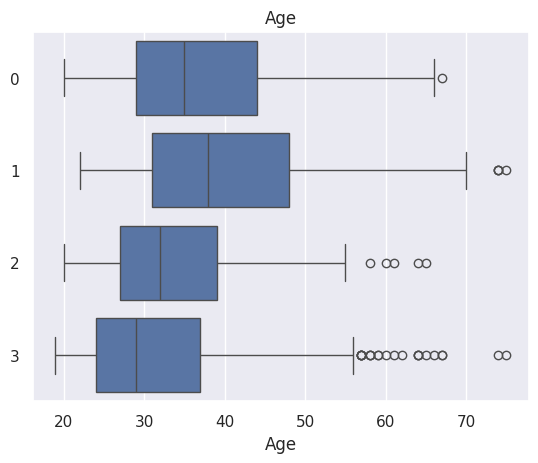

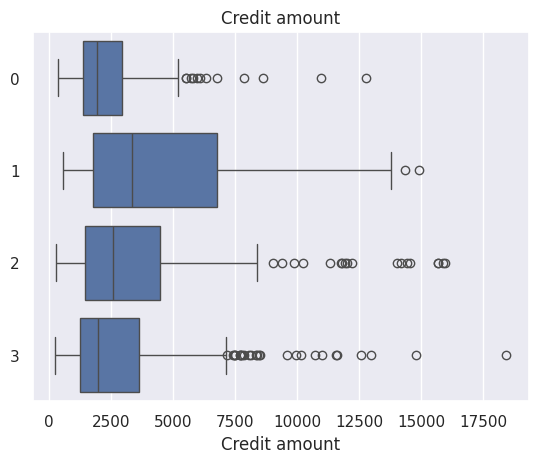

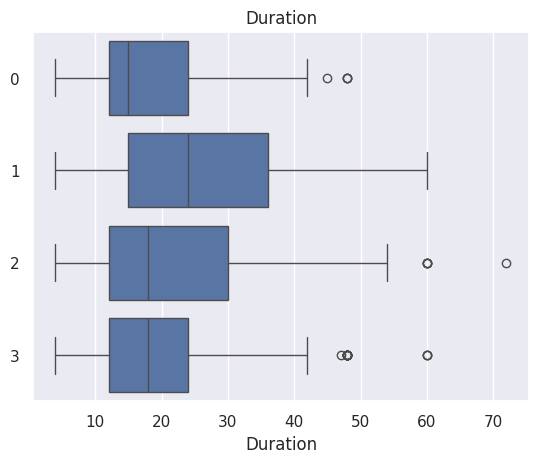

In [710]:
for col in data[['Age', 'Credit amount', 'Duration']]:
    sns.boxplot(data=cols_for_corr, x=col, y=labels_AC, orient='h')
    plt.title(col)
    plt.show();

Класьтер 1 выделяется по возрасту, размеру кредита и длительности.

# Результаты AHC (4 кластера)

In [711]:
data.groupby('labels_AC').median().T.round(2)

labels_AC,0,1,2,3
Age,35.0,38.0,32.0,29.0
Sex,1.0,1.0,1.0,0.0
Job,2.0,2.0,2.0,2.0
Housing,1.0,1.0,1.0,1.0
Saving accounts,1.0,1.0,1.0,1.0
Checking account,0.0,0.0,2.0,1.0
Credit amount,1941.0,3326.5,2577.0,1959.0
Duration,15.0,24.0,18.0,18.0
Purpose,5.0,1.0,4.0,4.0
labels_9,7.0,8.0,4.0,5.0


# DBSCAN

In [371]:
from sklearn.cluster import DBSCAN

In [712]:
dbscan = DBSCAN().fit(X_scaled)
labels_dbscan = dbscan.labels_
plot_data = pd.DataFrame(zip(X_tsne[:,0], X_tsne[:,1], labels_dbscan), columns=['x', 'y', 'hue'])

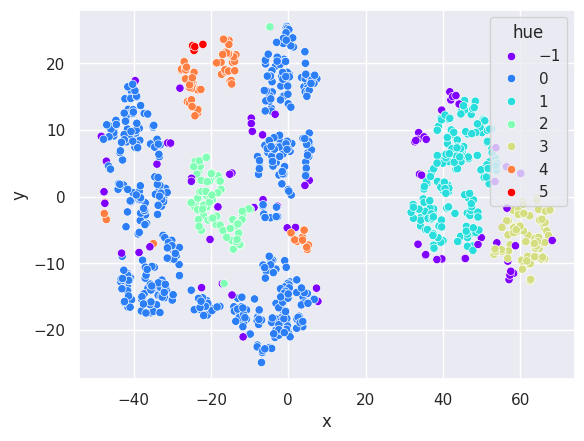

In [713]:
sns.scatterplot(plot_data, x='x', y='y', hue='hue', palette='rainbow');

In [714]:
data['labels_dbscan'] = labels_dbscan
data['labels_dbscan'].value_counts(normalize=True)

labels_dbscan
 0    0.500
 1    0.187
 3    0.082
-1    0.081
 2    0.076
 4    0.069
 5    0.005
Name: proportion, dtype: float64

Очень много точек попадает в кластер 0

Подбор eps:

In [715]:
silhouette = []
clusters = []
eps_range = np.arange(0.1,2,0.1)
for i in tqdm(eps_range):
    dbscan = DBSCAN(eps=i).fit(X_scaled)
    labels_dbscan = dbscan.labels_
    uniq_labels = np.unique(labels_dbscan)
    n_clusters = len(uniq_labels[uniq_labels != -1])
    if n_clusters > 1:
        score = silhouette_score(X_scaled, labels_dbscan)
    else:
        score = 0
    silhouette.append(score)
    clusters.append(n_clusters)

100%|███████████████████████████████████████████████████████████████████████████████████| 19/19 [00:01<00:00, 18.43it/s]


In [716]:
def dbscan_clustering(eps_range, X_scaled):
    eps_range = eps_range
    silhouette = []
    clusters = []
    for i in tqdm(eps_range):
        dbscan = DBSCAN(eps=i).fit(X_scaled)
        labels_dbscan = dbscan.labels_
        uniq_labels = np.unique(labels_dbscan)
        n_clusters = len(uniq_labels[uniq_labels != -1])
        if n_clusters > 1:
            score = silhouette_score(X_scaled, labels_dbscan)
        else:
            score = 0
        silhouette.append(score)
        clusters.append(n_clusters)
        
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.plot(eps_range, silhouette, marker='o', color=color)
    ax1.set_xlabel('eps')
    ax1.set_ylabel('silhouette', color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()

    color = 'tab:blue'
    ax2.plot(eps_range, clusters, marker='o', color=color)
    ax2.set_ylabel('n_clusters', color=color)  
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()
    plt.show()

100%|███████████████████████████████████████████████████████████████████████████████████| 90/90 [00:04<00:00, 22.19it/s]


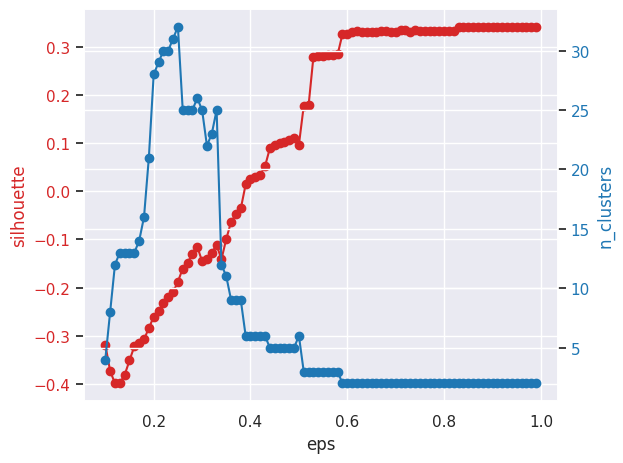

In [717]:
eps_range = np.arange(0.1,1,0.01)
dbscan_clustering(eps_range, X_scaled)

100%|███████████████████████████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 19.87it/s]


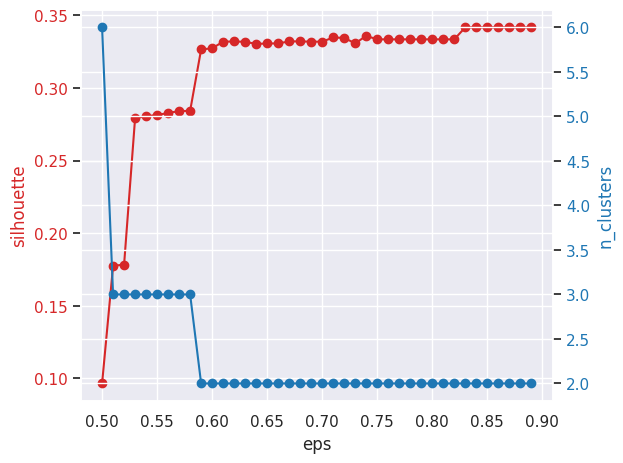

In [718]:
eps_range = np.arange(0.5,0.9,0.01)
dbscan_clustering(eps_range, X_scaled)

Есть какой-то максимум силуэтного коэффициента при eps между 0.5 и 0.6.

100%|███████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 20.20it/s]


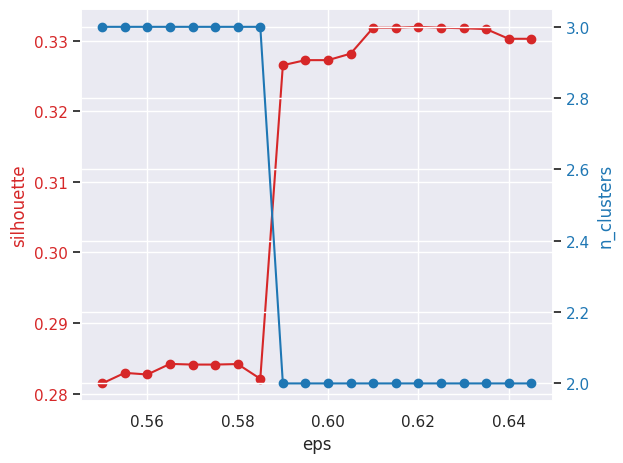

In [719]:
eps_range = np.arange(0.55,0.65,0.005)
dbscan_clustering(eps_range, X_scaled)

100%|█████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 18.78it/s]


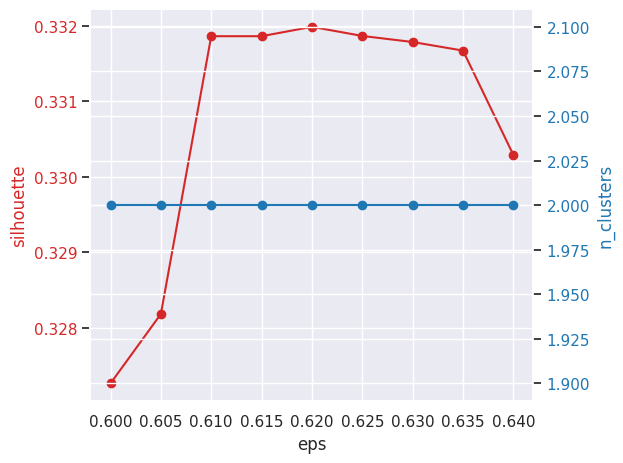

In [804]:
eps_range = np.arange(0.60,0.64,0.005)
dbscan_clustering(eps_range, X_scaled)

In [809]:
dbscan = DBSCAN(eps=0.62).fit(X_scaled)
labels_dbscan = dbscan.labels_
plot_data = pd.DataFrame(zip(X_tsne[:,0], X_tsne[:,1], labels_dbscan), columns=['x', 'y', 'hue'])

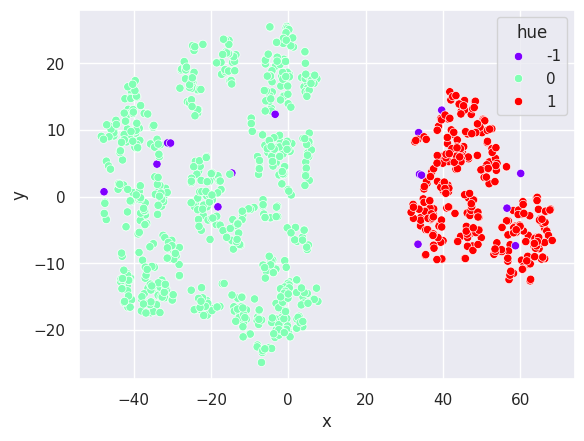

In [810]:
sns.scatterplot(plot_data, x='x', y='y', hue='hue', palette='rainbow');

In [811]:
data['labels_dbscan'] = labels_dbscan
data['labels_dbscan'].value_counts(normalize=True)

labels_dbscan
 0    0.682
 1    0.301
-1    0.017
Name: proportion, dtype: float64

Получилось уже лучше, чем до подбора eps, разбиение более равномерное, мусорный кластер маленький, но оставшиеся 2 похожи просто на разбиение по гендерному признаку. Попборовать подобрать min_samples?

In [812]:
data.groupby('labels_dbscan').median().T.round(2)

labels_dbscan,-1,0,1
Age,57.0,35.0,28.0
Sex,0.0,1.0,0.0
Job,2.0,2.0,2.0
Housing,0.0,1.0,1.0
Saving accounts,1.0,1.0,1.0
Checking account,2.0,1.0,1.0
Credit amount,5381.0,2434.5,1943.0
Duration,24.0,18.0,18.0
Purpose,1.0,3.0,4.0
labels_9,4.0,7.0,5.0


Кластеры 0 и 1 - это "средняя" категория людей, разделенная по гендерному признаку, а вот кластер -1 отличается - они склонны жить в социальном жилье, при этом длительность кредита и сумма выше, чем у других. С точки зрения банка - эта категория высокого риска.